In [1]:
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
block=1024
length=block*20

In [3]:
diracs = [ x/float(length) if (x % block) == 0 else 0.0 for x in range(0,length) ]

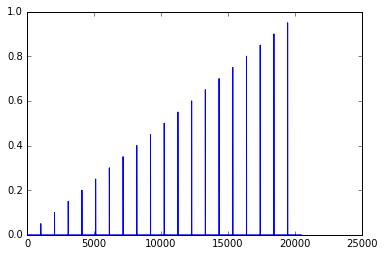

In [4]:
plt.plot(diracs)

In [6]:
import math
wave = [ (int(x/block) / float(length/block)) * math.sin(x*math.pi/(block/8)) for x in range(0,length)]

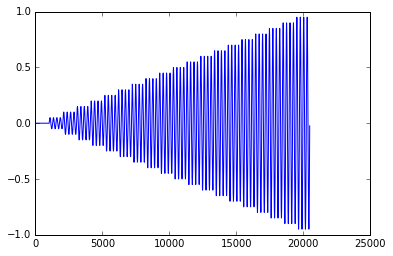

In [7]:
plt.plot(wave)

In [40]:
duration=20.0
rate=22050
nsamples=duration*rate
repeats=int(nsamples/length)

In [41]:
data=[diracs * repeats, wave * repeats]

In [42]:
import numpy as np
ndata = np.uint8(np.array(data) * 127.0 + 128.0)

In [43]:
ndata = np.swapaxes(ndata, 0, 1)
ndata.shape

(430080, 2)

In [44]:
from scipy.io.wavfile import write
write('/tmp/test.wav', rate, ndata)